In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [2]:
# Starting dataset
df = pd.read_csv('customer_dataframe.csv', sep='\t', index_col=0)
df.head()

,TProd,DProd,MaxPO,MinPO,MeanProdOrder,TSale,MinPSale,MaxPSale,MeanSaleOrder,TRProd,MeanPSale,TOrder,SETSaleQta,SESaleQtaOrder
CustomerID,,,,,,,,,,,,,,
17850,1702,21,141,12,48.629,5317.89,6.36,107.25,151.940,31,3.960,34,4.137,3.186
13047,1355,105,309,3,84.688,3089.10,6.64,68.00,193.069,35,3.926,9,5.421,3.875
12583,4978,114,714,100,292.824,6629.34,6.80,132.80,389.961,50,2.140,15,5.804,4.087
13748,439,24,208,8,87.800,948.25,9.36,204.00,189.650,0,3.996,5,4.080,2.322
15100,58,1,32,16,9.667,635.10,175.20,350.40,105.850,22,10.950,3,2.252,2.252


# Normalization

In [3]:
scaler = StandardScaler()
scaler.fit(df.to_numpy())
df_std = scaler.transform(df.to_numpy())

In [4]:
pca = PCA(n_components=14)
principalComponents = pca.fit_transform(df_std)
df_pca = pd.DataFrame(data = principalComponents, columns = ['pca1','pca2','pca3','pca4','pca5','pca6','pca7','pca8','pca9','pca10','pca11','pca12','pca13','pca14'])

In [5]:
print("Components part:", pca.components_)
print("SV part:", pca.singular_values_)

Components part: [[ 0.38207997  0.2811712   0.39521805  0.11808647  0.27577012  0.37519218
   0.08664571  0.19419036  0.30207248  0.21673629  0.03844096  0.30678532
   0.21389177  0.25142235]
 [-0.07795075 -0.28822192  0.13097089  0.43166618  0.3653106  -0.07331026
   0.31459036  0.19519483  0.34138612  0.01833563  0.13375087 -0.30559801
  -0.28401558 -0.35020484]
 [ 0.01699274 -0.09932742 -0.11269428 -0.33028501 -0.30750706  0.09713137
   0.02664097  0.56762637  0.05360332  0.07476229  0.63760759  0.0417379
  -0.15527944  0.01710769]
 [-0.35883139  0.2884294  -0.17917791  0.23616292  0.14366983 -0.33003718
  -0.04418211  0.14863628  0.21624056 -0.35352986  0.27023278 -0.0313651
   0.48300193  0.2598399 ]
 [-0.261542    0.0931644  -0.11217748  0.01625969 -0.08968283 -0.2762783
   0.64968961 -0.00501972 -0.12430597  0.54616297 -0.08596154  0.1871204
  -0.00212501  0.21776044]
 [-0.15162306 -0.2083163   0.15535804 -0.01736512 -0.00622419 -0.14893495
  -0.49377951  0.08049281  0.09435952 

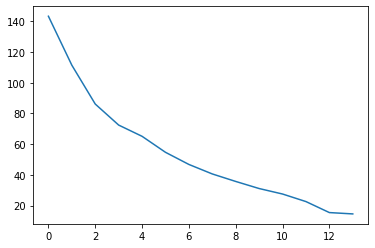

In [26]:
plt.plot(range(len(pca.singular_values_)), pca.singular_values_)

In [27]:
count = 1
most_used = list()
for arr in pca.components_:
    ind1 = -1
    val1 = -1
    ind2 = -1
    val2 = -1
    for i in range(0, len(arr)):
        if abs(arr[i]) > val1:
            ind1, val1 = i, abs(arr[i])
        elif val2 == -1 or (abs(arr[i]) < val1 and abs(arr[i]) > val2):
            ind2, val2 = i, abs(arr[i])
    print(f"PCA{count}: {df.columns[ind1]} -> {val1}    -    {df.columns[ind2]} -> {val2}")
    
    print(f"PCA{count}: {ind1} -> {val1}    -    {ind2} -> {val2}\n")
    count += 1
    
    if ind1 not in most_used:
        most_used.append(ind1)
    if ind2 not in most_used:
        most_used.append(ind2)
        
print("Most used in PCA creation:",most_used)
print("Most used in PCA creation:",df.columns[most_used])

PCA1: MaxPO -> 0.3952180482857286    -    TSale -> 0.37519217713599
PCA1: 2 -> 0.3952180482857286    -    5 -> 0.37519217713599

PCA2: MinPO -> 0.4316661849531521    -    MeanProdOrder -> 0.36531059906024355
PCA2: 3 -> 0.4316661849531521    -    4 -> 0.36531059906024355

PCA3: MeanPSale -> 0.6376075945444536    -    MeanProdOrder -> 0.30750706378736037
PCA3: 10 -> 0.6376075945444536    -    4 -> 0.30750706378736037

PCA4: SETSaleQta -> 0.4830019346904959    -    TRProd -> 0.35352985552520866
PCA4: 12 -> 0.4830019346904959    -    9 -> 0.35352985552520866

PCA5: MinPSale -> 0.6496896106466628    -    TRProd -> 0.5461629733163378
PCA5: 6 -> 0.6496896106466628    -    9 -> 0.5461629733163378

PCA6: TRProd -> 0.6445797310982895    -    SETSaleQta -> 0.3517437973013525
PCA6: 9 -> 0.6445797310982895    -    12 -> 0.3517437973013525

PCA7: TOrder -> 0.4211505584702798    -    MinPSale -> 0.35798277251174665
PCA7: 11 -> 0.4211505584702798    -    6 -> 0.35798277251174665

PCA8: SESaleQtaOrder 

In [7]:
scaler = MinMaxScaler()
df_norm = scaler.fit_transform(df_pca.to_numpy())

# K-MEANS USING PCA DIRECTLY (DELETE THIS)

In [8]:
kmeans = KMeans(n_clusters=4, n_init=100)
kmeans.fit(df_norm)

KMeans(n_clusters=4, n_init=100)

In [9]:
kmeans.labels_[:]

array([0, 0, 0, ..., 1, 1, 1])

In [10]:
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2, 3]), array([1737, 2571,    7,   18], dtype=int64))

In [11]:
hist, bins = np.histogram(kmeans.labels_, 
                          bins=range(0, len(set(kmeans.labels_)) + 1))
dict(zip(bins, hist))

{0: 1737, 1: 2571, 2: 7, 3: 18}

Center num 4


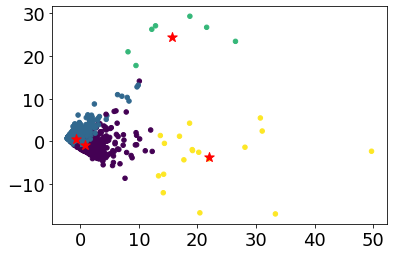

array([[ 8.05604096e-01, -9.03275902e-01, -5.65146348e-02,
         4.97662280e-01,  2.16600854e-01,  8.14405883e-03,
        -2.61015599e-01,  2.37290170e-01,  3.23941388e-02,
        -8.08368392e-02,  3.77946761e-02, -9.19904737e-02,
        -9.53314288e-03,  2.00472210e-03],
       [-7.40696673e-01,  5.68441323e-01,  1.52419594e-02,
        -2.97908569e-01, -1.66383546e-01,  4.92662304e-03,
         1.66907071e-01, -1.54659712e-01, -2.25081225e-02,
         4.69629241e-02, -1.70425400e-02,  6.11037480e-02,
         4.56786409e-03, -2.00607522e-03],
       [ 1.56478140e+01,  2.45296860e+01,  4.68755805e+00,
         4.97295837e+00,  1.05402541e+01, -3.90418165e+00,
        -1.59599312e+00,  1.44938815e-01, -1.83507155e-01,
         1.43431042e+00, -2.35447082e+00, -2.87653442e-01,
        -1.02726691e-01,  5.20141432e-01],
       [ 2.20560241e+01, -3.64732886e+00,  1.44967668e+00,
        -7.36286603e+00, -1.21457668e+00,  2.88839425e-02,
         1.94500244e+00, -8.42529320e-01,  1.

In [12]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)
print("Center num",len(centers))
# plt.xlim((10,25))

plt.scatter(df_pca['pca1'], df_pca['pca2'], c=kmeans.labels_, 
            s=20)
plt.scatter(centers[:, 0], centers[:, 1], s=100, marker='*', c='r')
plt.tick_params(axis='both', which='major', labelsize=18)
plt.show()
centers

In [13]:
sse_list = list()
max_k = 30
for k in tqdm(range(2, max_k + 1), total=max_k - 1, desc="Iterating over possible K values"):
    kmeans_iter = KMeans(n_clusters=k, n_init=10, max_iter=100)
    kmeans_iter.fit(df_norm)
    
    sse = kmeans_iter.inertia_
    sse_list.append(sse)

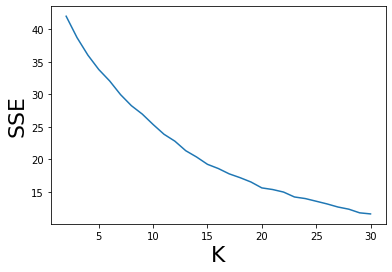

In [14]:
plt.plot(range(2, len(sse_list) + 2), sse_list)
# plt.xlim((0,10))
plt.ylabel('SSE', fontsize=22)
plt.xlabel('K', fontsize=22)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.show()

# TRYING SOMETHING ELSE..

In [15]:
df2 = df.copy()
df2.drop(columns = list(set(df2.columns) - set(df2.columns[most_used])))

,TProd,MaxPO,MinPO,MeanProdOrder,TSale,MinPSale,MeanSaleOrder,TRProd,MeanPSale,TOrder,SETSaleQta,SESaleQtaOrder
CustomerID,,,,,,,,,,,,
17850,1702,141,12,48.629,5317.89,6.36,151.940,31,3.960,34,4.137,3.186
13047,1355,309,3,84.688,3089.10,6.64,193.069,35,3.926,9,5.421,3.875
12583,4978,714,100,292.824,6629.34,6.80,389.961,50,2.140,15,5.804,4.087
13748,439,208,8,87.800,948.25,9.36,189.650,0,3.996,5,4.080,2.322
15100,58,32,16,9.667,635.10,175.20,105.850,22,10.950,3,2.252,2.252
...,...,...,...,...,...,...,...,...,...,...,...,...
13436,76,76,76,76.000,196.89,10.20,196.890,0,5.830,1,3.418,0.000
15520,314,314,314,314.000,343.50,9.48,343.500,0,1.724,1,2.997,0.000
13298,96,96,96,96.000,360.00,90.00,360.000,0,3.750,1,1.000,0.000


In [16]:
scaler = MinMaxScaler()
df2_norm = scaler.fit_transform(df2.to_numpy())

In [17]:
sse_list = list()
max_k = 30
for k in tqdm(range(2, max_k + 1), total=max_k - 1, desc="Iterating over possible K values"):
    kmeans_iter = KMeans(n_clusters=k, n_init=10, max_iter=100)
    kmeans_iter.fit(df2_norm)
    
    sse = kmeans_iter.inertia_
    sse_list.append(sse)

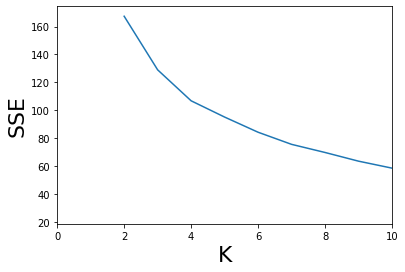

In [18]:
plt.plot(range(2, len(sse_list) + 2), sse_list)
plt.xlim((0,10))
plt.ylabel('SSE', fontsize=22)
plt.xlabel('K', fontsize=22)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.show()

In [19]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4333 entries, 17850 to 12713
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TProd           4333 non-null   int64  
 1   DProd           4333 non-null   int64  
 2   MaxPO           4333 non-null   int64  
 3   MinPO           4333 non-null   int64  
 4   MeanProdOrder   4333 non-null   float64
 5   TSale           4333 non-null   float64
 6   MinPSale        4333 non-null   float64
 7   MaxPSale        4333 non-null   float64
 8   MeanSaleOrder   4333 non-null   float64
 9   TRProd          4333 non-null   int64  
 10  MeanPSale       4333 non-null   float64
 11  TOrder          4333 non-null   int64  
 12  SETSaleQta      4333 non-null   float64
 13  SESaleQtaOrder  4333 non-null   float64
dtypes: float64(8), int64(6)
memory usage: 507.8 KB


In [20]:
kmeans2 = KMeans(n_clusters=5, n_init=100)
kmeans2.fit(df2_norm)

KMeans(n_clusters=5, n_init=100)

In [21]:
np.unique(kmeans2.labels_, return_counts=True)

(array([0, 1, 2, 3, 4]), array([1468, 1509,  700,  635,   21], dtype=int64))

In [22]:
hist, bins = np.histogram(kmeans2.labels_, 
                          bins=range(0, len(set(kmeans2.labels_)) + 1))
dict(zip(bins, hist))

{0: 1468, 1: 1509, 2: 700, 3: 635, 4: 21}

Center num 5


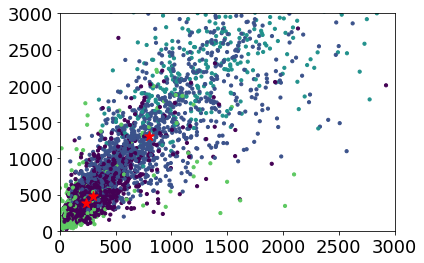

array([[3.00597411e+02, 2.79741144e+01, 2.57363760e+02, 2.07354223e+02,
        2.17503004e+02, 4.83317507e+02, 6.92920300e+00, 6.46405177e+01,
        3.50183280e+02, 2.38215259e+00, 3.15966621e+00, 1.36784741e+00,
        3.77040599e+00, 4.50657357e-01],
       [8.03483422e+02, 6.66545093e+01, 3.64055040e+02, 1.22293103e+02,
        1.91893003e+02, 1.30974904e+03, 5.07443634e+00, 9.15644032e+01,
        3.11926362e+02, 1.01173740e+01, 3.12913196e+00, 3.75132626e+00,
        4.68997546e+00, 1.99379377e+00],
       [2.90461286e+03, 1.56111429e+02, 5.92904286e+02, 5.35300000e+01,
        2.02571919e+02, 4.96830771e+03, 3.46384286e+00, 1.76075286e+02,
        3.44650410e+02, 5.18485714e+01, 3.01775429e+00, 1.21842857e+01,
        5.58550000e+00, 3.64986143e+00],
       [2.39188679e+02, 6.35534591e+00, 1.78908805e+02, 1.38191824e+02,
        1.53756777e+02, 3.85242940e+02, 6.03151258e+01, 1.97469670e+02,
        2.38887226e+02, 3.21069182e+00, 5.66869811e+00, 1.36949686e+00,
        1.734

In [23]:
centers = scaler.inverse_transform(kmeans2.cluster_centers_)
print("Center num",len(centers))
plt.xlim((0,3000))
plt.ylim((0,3000))

plt.scatter(df2['TProd'], df2['TSale'], c=kmeans2.labels_, 
            s=10)
plt.scatter(centers[:, 0], centers[:, 5], s=100, marker='*', c='r')
plt.tick_params(axis='both', which='major', labelsize=18)
plt.show()
centers

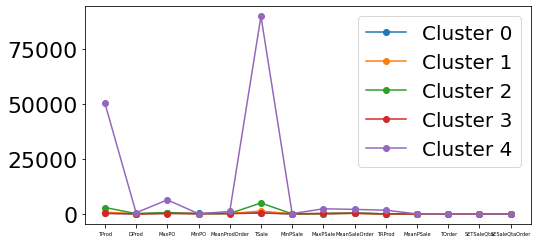

In [24]:
plt.figure(figsize=(8, 4))
for i in range(0, len(centers)):
    plt.plot(centers[i], marker='o', label='Cluster %s' % i)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xticks(range(0, len(df2.columns)), df2.columns, fontsize=5)
plt.legend(fontsize=20)
plt.show()